Evolución de los Precios de la Electricidad
===

# Instrucciones

En el archivo `precios.zip`  se encuentran los archivos `Precio_Bolsa_Nacional_($kwh)_ano.xls` en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada realice las siguientes actividades. 

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Debe transformar la tabla de tal forma que quede con las columnas `Fecha`, `Hora` y `Precio` (únicamente tres columnas).

**2.--** Compute e imprima el número de registros con datos faltantes.

**3.--** Compute e imprima el número de registros duplicados.

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

**5.--** Compute y grafique el precio primedio diario.

**6.--** Compute y grafique el precio máximo por mes.

**7.--** Compute y grafique el precio mínimo mensual.

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

---

# 1)

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math
from datetime import datetime

In [2]:
def leer_precios(filename):          
    for k in range(10):
        df = pd.read_excel(filename,
                           skiprows = k,
                           usecols = list(range(25)))
        if df.iloc[0,0] == 'Fecha':
            df = pd.read_excel(filename,
                               skiprows = k+1,
                               usecols = list(range(25)))    
            break
        
    return(df)

In [4]:
filenames = !ls precios/
dfs = []
for filename in filenames:
    dfs.append(leer_precios("precios/"+filename))

In [5]:
dfs=pd.concat(dfs)

In [6]:
dfsFinal=pd.melt(dfs,id_vars=['Fecha'])

In [7]:
dfsFinal.rename(columns={'variable':'Hora'},inplace=True)
dfsFinal.rename(columns={'value':'Precio'},inplace=True)

In [8]:
FechaNulos=dfsFinal[dfsFinal.Fecha.isnull()]   #Extrae la base donde la columna Fecha es nula
FechaNulos.shape                               #Muestra el tamaño del dataframe
FechaNulos.index                               #Muestra el número de las filas del dataframe principal en donde están ubicados los datos del dataframe anterior  
dfsFinal.drop(dfsFinal[dfsFinal.Fecha.isnull()].index,inplace=True)
dfsFinal

,Fecha,Hora,Precio
0,1995-07-20,0,NaN
1,1995-07-21,0,1.073000
2,1995-07-22,0,1.073000
3,1995-07-23,0,1.073000
4,1995-07-24,0,1.000000
5,1995-07-25,0,0.990000
6,1995-07-26,0,0.500000
7,1995-07-27,0,0.500000
8,1995-07-28,0,0.000000
9,1995-07-29,0,1.000000


# 2)

In [9]:
Faltantes = dfsFinal[dfsFinal['Precio'].isnull()|dfsFinal['Hora'].isnull()|dfsFinal['Fecha'].isnull()]
Faltantes.shape[0]

22

# 3)

In [10]:
Registros_Duplicados=dfsFinal[dfsFinal.duplicated()]
len(Registros_Duplicados)

1759

# 4)

In [11]:
dfsCompleta_sin_NaN=dfsFinal.dropna()

In [12]:
dfsCompleta=dfsCompleta_sin_NaN.drop_duplicates()
len(dfsCompleta)

199819

# 5)

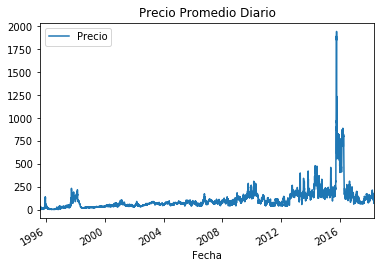

In [13]:
Promedio_Diario=dfsCompleta.groupby(['Fecha'])['Precio'].mean().reset_index()
Promedio_Diario.plot(x='Fecha',y='Precio',title='Precio Promedio Diario');

# 6)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

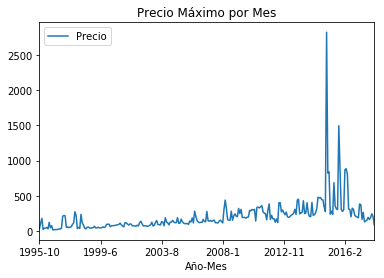

In [14]:
dfsCompleta['Fecha']=pd.to_datetime(dfsCompleta['Fecha'])
dfsCompleta1=dfsCompleta
dfsCompleta1['Mes']=dfsCompleta1['Fecha'].dt.month.astype(str)
dfsCompleta1['Año']=dfsCompleta1['Fecha'].dt.year.astype(str)
dfsCompleta1['Año-Mes']=dfsCompleta1['Año'] + '-' + dfsCompleta1['Mes']
Precio_Máximo_Mes=dfsCompleta.groupby(dfsCompleta1['Año-Mes'])['Precio'].max().reset_index()
Precio_Máximo_Mes.plot(x='Año-Mes',y='Precio',title='Precio Máximo por Mes');

# 7)

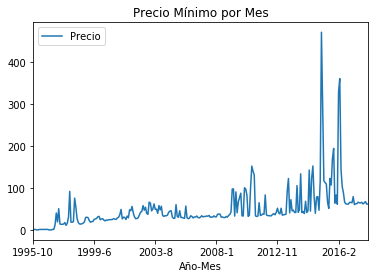

In [15]:
Precio_Mínimo_Mes=dfsCompleta.groupby(dfsCompleta1['Año-Mes'])['Precio'].min().reset_index()
Precio_Mínimo_Mes.plot(x='Año-Mes',y='Precio',title='Precio Mínimo por Mes');

# 8)

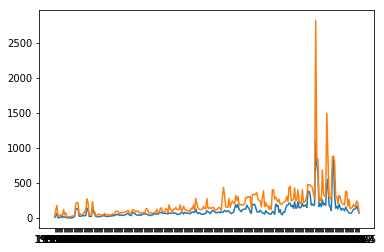

In [16]:
Precio_Promedio_Mes=dfsCompleta.groupby(dfsCompleta1['Año-Mes'])['Precio'].mean().reset_index()
tabla_mean_max_mes=pd.DataFrame(columns=['Mes','Precio_Promedio_Mensual','Precio_Máximo_Mensual'])
tabla_mean_max_mes['Mes']=Precio_Promedio_Mes['Año-Mes']
tabla_mean_max_mes['Precio_Promedio_Mensual']=Precio_Promedio_Mes['Precio']
tabla_mean_max_mes['Precio_Máximo_Mensual']=Precio_Máximo_Mes['Precio']
plt.plot(tabla_mean_max_mes['Mes'], tabla_mean_max_mes['Precio_Promedio_Mensual'], tabla_mean_max_mes['Mes'], tabla_mean_max_mes['Precio_Máximo_Mensual'])
plt.show()

# 9)

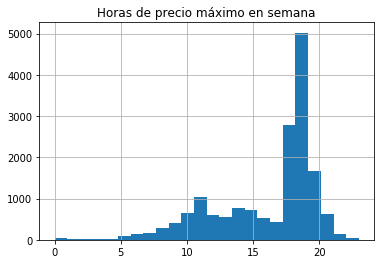

In [17]:
Base_Week = dfsCompleta.copy()
Base_Week['Día de la semana'] = [a.weekday() for a in pd.to_datetime(Base_Week['Fecha'])]
Precio_Máximo_Diario = Base_Week.groupby('Fecha')['Precio'].max()
Precio_Máximo_Diario_Hora = pd.merge(Precio_Máximo_Diario, Base_Week, on=['Fecha','Precio'], how='inner')
Precio_Máximo_Semana_Hora = Precio_Máximo_Diario_Hora[Precio_Máximo_Diario_Hora['Día de la semana'] < 5]
Precio_Máximo_Semana_Hora = Precio_Máximo_Semana_Hora[['Fecha','Precio','Hora']]
Precio_Máximo_Semana_Hora['Hora'] = Precio_Máximo_Semana_Hora['Hora'].astype(int)
Precio_Máximo_Semana_Hora.hist(column='Hora', bins=24)
plt.title('Horas de precio máximo en semana');

# 10)

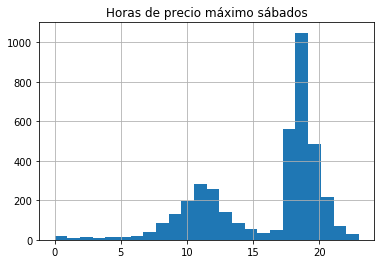

In [18]:
Precio_Máximo_Sábado_Hora = Precio_Máximo_Diario_Hora[Precio_Máximo_Diario_Hora['Día de la semana'] == 5]
Precio_Máximo_Sábado_Hora = Precio_Máximo_Sábado_Hora[['Fecha','Precio','Hora']]
Precio_Máximo_Sábado_Hora['Hora'] = Precio_Máximo_Sábado_Hora['Hora'].astype(int)
Precio_Máximo_Sábado_Hora.hist(column='Hora', bins=24)
plt.title('Horas de precio máximo sábados');

# 11)

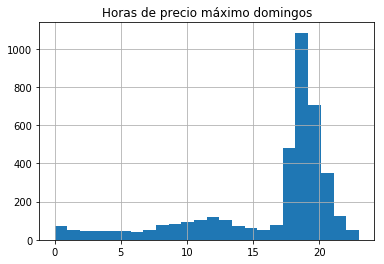

In [19]:
Precio_Máximo_Domingo_Hora = Precio_Máximo_Diario_Hora[Precio_Máximo_Diario_Hora['Día de la semana'] == 6]
Precio_Máximo_Domingo_Hora = Precio_Máximo_Domingo_Hora[['Fecha','Precio','Hora']]
Precio_Máximo_Domingo_Hora['Hora'] = Precio_Máximo_Domingo_Hora['Hora'].astype(int)
Precio_Máximo_Domingo_Hora.hist(column='Hora', bins=24)
plt.title('Horas de precio máximo domingos');

# 12)

In [20]:
Base_Completa = dfsCompleta.copy()
Precio_Máximo_Año = Base_Completa.groupby('Año')['Precio'].min()
Precio_Máximo_Año_Fecha = pd.merge(Precio_Máximo_Año, Base_Completa, on=['Año','Precio'], how='inner')
Precio_Máximo_Año_Fecha = Precio_Máximo_Año_Fecha[['Fecha','Precio']]
Precio_Máximo_Año_Fecha

,Fecha,Precio
0,1995-07-28,0.000000
1,1995-07-31,0.000000
2,1995-08-01,0.000000
3,1995-10-13,0.000000
4,1995-07-28,0.000000
5,1995-07-31,0.000000
6,1995-08-01,0.000000
7,1995-10-13,0.000000
8,1995-07-28,0.000000
9,1995-07-29,0.000000


# 13)

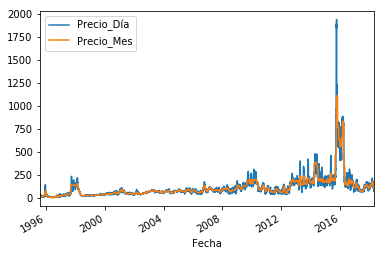

In [21]:
Base_Completa1 = dfsCompleta.copy()
Base_Completa1['Fecha'] = pd.to_datetime(Base_Completa1['Fecha'])
Promedio_Mes = Base_Completa1.groupby(['Año','Mes'])['Precio'].mean()
Promedio_Día = Base_Completa1.groupby(['Fecha'])['Precio'].mean()
Promedio_Mes_Día = pd.merge(Base_Completa1,Promedio_Mes, on=['Año','Mes'], how='inner',suffixes=('', '_Mes'))
Promedio_Mes_Día = pd.merge(Promedio_Mes_Día,Promedio_Día, on=['Fecha'], how='inner',suffixes=('', '_Día'))
Promedio_Mes_Día = Promedio_Mes_Día[['Fecha', 'Precio_Mes', 'Precio_Día' ]]
Promedio_Mes_Día = Promedio_Mes_Día.set_index('Fecha')
plot = Promedio_Mes_Día[['Precio_Día','Precio_Mes']].plot()